In [71]:
import os
import pandas as pd
import IPython.display as ipd
import librosa
import librosa.display
import music21
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from collections import Counter
import copy
import glob

Como em nosso corpus temos um número variado de acordes de cada tipo, o objetivo desse notebook é gerar alguns dos menos frequentes para balancear nossa base.

### Testando:

D

In [10]:
d = music21.duration.Duration(2.0)
dMaj = music21.chord.Chord(['D', 'F#', 'A'], duration=d)

dMaj

<music21.chord.Chord D F# A>

In [11]:
dMaj.write('midi', 'teste.mid')

'teste.mid'

In [12]:
!timidity teste.mid -Ow -o teste.wav

Playing teste.mid
MIDI file: teste.mid
Format: 1  Tracks: 1  Divisions: 1024
Sequence: 
Playing time: ~5 seconds
Notes cut: 0
Notes lost totally: 0


D7

In [13]:
d = music21.duration.Duration(2.0)
D7 = music21.chord.Chord(['D3', 'F#3', 'A3', 'C4'], duration=d)

D7

<music21.chord.Chord D3 F#3 A3 C4>

In [14]:
D7.write('midi', 'D7.mid')

'D7.mid'

In [15]:
!timidity D7.mid -Ow -o D7.wav

Playing D7.mid
MIDI file: D7.mid
Format: 1  Tracks: 1  Divisions: 1024
Sequence: 
Playing time: ~5 seconds
Notes cut: 0
Notes lost totally: 0


### Gerando tétrades

Aqui, vamos experimentar criar um script para gerar todos os acordes com sétimas, maiores e menores.
Tenho a intuição de que, para esta tarefa, seja mais natural gerar os acordes a partir dos intervalos de semitons entre suas notas.

Na documentação do music21, temos:

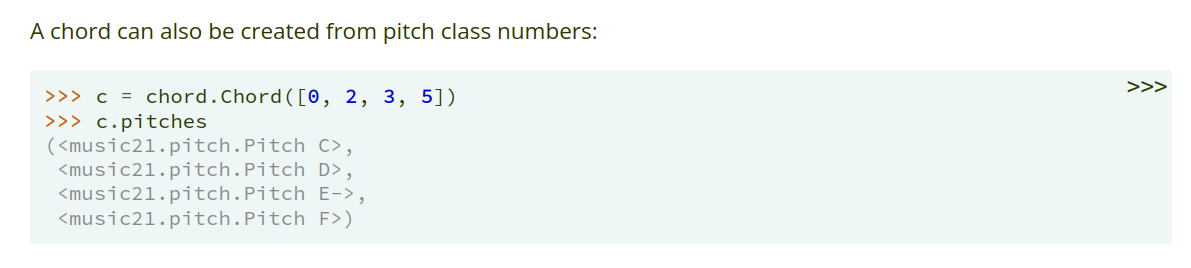

que é a abordagem que utilizaremos para gerar os acordes.

In [16]:
semitons = lista = list(range(0,12))
semitons.extend(list(range(0,12)))
semitons

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [64]:
notes = ['C','Db','D','Eb','E','F','Gb','G','Ab','A','Bb','B']
notes

['C', 'Db', 'D', 'Eb', 'E', 'F', 'Gb', 'G', 'Ab', 'A', 'Bb', 'B']

#### Acordes maiores com sétima maior

In [128]:
d = music21.duration.Duration(2.0)

In [129]:
corpus_folder = 'corpus/generated_chords'
chord_type = 'maj7'
for i in list(range(12)):
    
    fundamental = 0 + i
    terca = fundamental + 4
    quinta = fundamental + 7
    setima = fundamental + 11

    i_C = semitons[fundamental]
    i_E = semitons[terca]
    i_G = semitons[quinta]
    i_B = semitons[setima]

    acorde_list = [i_C, i_E, i_G, i_B]
    acorde = music21.chord.Chord(list(acorde_list), duration=d)
    
    midi_subfolder = '{}/{}/midi_original'.format(corpus_folder, 
                                                  chord_type)
    
    os.makedirs(midi_subfolder, 
                exist_ok=True)  
    
    acorde_file_name = '{}/{}{}'.format(midi_subfolder, 
                                           notes[i], 
                                           chord_type)
    
    acorde_file = acorde_file_name + '.mid'
    
    acorde.write('midi', acorde_file)
    
    
    !timidity {acorde_file_name}.mid -Ow -o {acorde_file_name}.wav
    
    print(notes[i], acorde.pitches)
    print('---------------------------------')

Playing corpus/generated_chords/maj7/midi_original/Cmaj7.mid
MIDI file: corpus/generated_chords/maj7/midi_original/Cmaj7.mid
Format: 1  Tracks: 1  Divisions: 1024
Sequence: 
Playing time: ~5 seconds
Notes cut: 0
Notes lost totally: 0
C (<music21.pitch.Pitch C>, <music21.pitch.Pitch E>, <music21.pitch.Pitch G>, <music21.pitch.Pitch B>)
---------------------------------
Playing corpus/generated_chords/maj7/midi_original/Dbmaj7.mid
MIDI file: corpus/generated_chords/maj7/midi_original/Dbmaj7.mid
Format: 1  Tracks: 1  Divisions: 1024
Sequence: 
Playing time: ~5 seconds
Notes cut: 0
Notes lost totally: 0
Db (<music21.pitch.Pitch C#>, <music21.pitch.Pitch E#>, <music21.pitch.Pitch G#>, <music21.pitch.Pitch B#>)
---------------------------------
Playing corpus/generated_chords/maj7/midi_original/Dmaj7.mid
MIDI file: corpus/generated_chords/maj7/midi_original/Dmaj7.mid
Format: 1  Tracks: 1  Divisions: 1024
Sequence: 
Playing time: ~5 seconds
Notes cut: 0
Notes lost totally: 0
D (<music21.pitch

In [130]:
corpus_folder

'corpus/generated_chords'

Variando os instrumentos:

In [131]:
instruments = [music21.instrument.Accordion(), 
               music21.instrument.Banjo(),
               music21.instrument.Clarinet(), 
               music21.instrument.Oboe(), 
               music21.instrument.Flute(), 
               music21.instrument.Guitar(),
               music21.instrument.Harp(), 
               music21.instrument.Saxophone()]

In [132]:
for file in glob.glob(midi_subfolder + '/*.mid'):
               
    acorde = music21.converter.parse(file)
    acorde_name = file.split('/')[-1].split('.mid')[0]
    
    
    for instrument in instruments[1:]:
        
        instrument_name = instrument.bestName()
        instrum_subfolder = '{}/{}/midi_{}'.format(corpus_folder, 
                                                   chord_type, 
                                                   instrument_name)
    
        os.makedirs(instrum_subfolder, 
                    exist_ok=True)  
        
        for p in acorde.parts:
            p.insert(0, instrument)
                    
        
        new_file_name = '{}/{}'.format(instrum_subfolder, 
                                           acorde_name)
        new_file = new_file_name + '.mid'
        acorde.write('midi', new_file)
        
        !timidity {new_file} -Ow -o {new_file_name}.wav

Playing corpus/generated_chords/maj7/midi_Banjo/Dmaj7.mid
MIDI file: corpus/generated_chords/maj7/midi_Banjo/Dmaj7.mid
Format: 1  Tracks: 1  Divisions: 1024
Sequence: Banjo
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0
Playing corpus/generated_chords/maj7/midi_Clarinet/Dmaj7.mid
MIDI file: corpus/generated_chords/maj7/midi_Clarinet/Dmaj7.mid
Format: 1  Tracks: 1  Divisions: 1024
Sequence: Banjo
Playing time: ~5 seconds
Notes cut: 0
Notes lost totally: 0
Playing corpus/generated_chords/maj7/midi_Oboe/Dmaj7.mid
MIDI file: corpus/generated_chords/maj7/midi_Oboe/Dmaj7.mid
Format: 1  Tracks: 1  Divisions: 1024
Sequence: Banjo
Playing time: ~5 seconds
Notes cut: 0
Notes lost totally: 0
Playing corpus/generated_chords/maj7/midi_Flute/Dmaj7.mid
MIDI file: corpus/generated_chords/maj7/midi_Flute/Dmaj7.mid
Format: 1  Tracks: 1  Divisions: 1024
Sequence: Banjo
Playing time: ~5 seconds
Notes cut: 0
Notes lost totally: 0
Playing corpus/generated_chords/maj7/midi_Guitar/Dmaj7.mid
MIDI 

Playing corpus/generated_chords/maj7/midi_Banjo/Abmaj7.mid
MIDI file: corpus/generated_chords/maj7/midi_Banjo/Abmaj7.mid
Format: 1  Tracks: 1  Divisions: 1024
Sequence: Banjo
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0
Playing corpus/generated_chords/maj7/midi_Clarinet/Abmaj7.mid
MIDI file: corpus/generated_chords/maj7/midi_Clarinet/Abmaj7.mid
Format: 1  Tracks: 1  Divisions: 1024
Sequence: Banjo
Playing time: ~5 seconds
Notes cut: 0
Notes lost totally: 0
Playing corpus/generated_chords/maj7/midi_Oboe/Abmaj7.mid
MIDI file: corpus/generated_chords/maj7/midi_Oboe/Abmaj7.mid
Format: 1  Tracks: 1  Divisions: 1024
Sequence: Banjo
Playing time: ~5 seconds
Notes cut: 0
Notes lost totally: 0
Playing corpus/generated_chords/maj7/midi_Flute/Abmaj7.mid
MIDI file: corpus/generated_chords/maj7/midi_Flute/Abmaj7.mid
Format: 1  Tracks: 1  Divisions: 1024
Sequence: Banjo
Playing time: ~5 seconds
Notes cut: 0
Notes lost totally: 0
Playing corpus/generated_chords/maj7/midi_Guitar/Abmaj7.

Playing corpus/generated_chords/maj7/midi_Banjo/Dbmaj7.mid
MIDI file: corpus/generated_chords/maj7/midi_Banjo/Dbmaj7.mid
Format: 1  Tracks: 1  Divisions: 1024
Sequence: Banjo
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0
Playing corpus/generated_chords/maj7/midi_Clarinet/Dbmaj7.mid
MIDI file: corpus/generated_chords/maj7/midi_Clarinet/Dbmaj7.mid
Format: 1  Tracks: 1  Divisions: 1024
Sequence: Banjo
Playing time: ~5 seconds
Notes cut: 0
Notes lost totally: 0
Playing corpus/generated_chords/maj7/midi_Oboe/Dbmaj7.mid
MIDI file: corpus/generated_chords/maj7/midi_Oboe/Dbmaj7.mid
Format: 1  Tracks: 1  Divisions: 1024
Sequence: Banjo
Playing time: ~5 seconds
Notes cut: 0
Notes lost totally: 0
Playing corpus/generated_chords/maj7/midi_Flute/Dbmaj7.mid
MIDI file: corpus/generated_chords/maj7/midi_Flute/Dbmaj7.mid
Format: 1  Tracks: 1  Divisions: 1024
Sequence: Banjo
Playing time: ~5 seconds
Notes cut: 0
Notes lost totally: 0
Playing corpus/generated_chords/maj7/midi_Guitar/Dbmaj7.

#### Acordes maiores com sétima menor

In [133]:
d = music21.duration.Duration(2.0)

In [134]:
corpus_folder = 'corpus/generated_chords'
chord_type = '7'
for i in list(range(12)):
    
    fundamental = 0 + i
    terca = fundamental + 4
    quinta = fundamental + 7
    setima = fundamental + 10

    i_C = semitons[fundamental]
    i_E = semitons[terca]
    i_G = semitons[quinta]
    i_B = semitons[setima]

    acorde_list = [i_C, i_E, i_G, i_B]
    acorde = music21.chord.Chord(list(acorde_list), duration=d)
    
    midi_subfolder = '{}/{}/midi_original'.format(corpus_folder, 
                                                  chord_type)
    
    os.makedirs(midi_subfolder, 
                exist_ok=True)  
    
    acorde_file_name = '{}/{}{}'.format(midi_subfolder, 
                                           notes[i], 
                                           chord_type)
    
    acorde_file = acorde_file_name + '.mid'
    
    acorde.write('midi', acorde_file)
    
    
    !timidity {acorde_file_name}.mid -Ow -o {acorde_file_name}.wav
    
    print(notes[i], acorde.pitches)
    print('---------------------------------')

Playing corpus/generated_chords/7/midi_original/C7.mid
MIDI file: corpus/generated_chords/7/midi_original/C7.mid
Format: 1  Tracks: 1  Divisions: 1024
Sequence: 
Playing time: ~5 seconds
Notes cut: 0
Notes lost totally: 0
C (<music21.pitch.Pitch C>, <music21.pitch.Pitch E>, <music21.pitch.Pitch G>, <music21.pitch.Pitch B->)
---------------------------------
Playing corpus/generated_chords/7/midi_original/Db7.mid
MIDI file: corpus/generated_chords/7/midi_original/Db7.mid
Format: 1  Tracks: 1  Divisions: 1024
Sequence: 
Playing time: ~5 seconds
Notes cut: 0
Notes lost totally: 0
Db (<music21.pitch.Pitch C#>, <music21.pitch.Pitch E#>, <music21.pitch.Pitch G#>, <music21.pitch.Pitch B>)
---------------------------------
Playing corpus/generated_chords/7/midi_original/D7.mid
MIDI file: corpus/generated_chords/7/midi_original/D7.mid
Format: 1  Tracks: 1  Divisions: 1024
Sequence: 
Playing time: ~5 seconds
Notes cut: 0
Notes lost totally: 0
D (<music21.pitch.Pitch D>, <music21.pitch.Pitch F#>,

Variando os instrumentos:

In [135]:
for file in glob.glob(midi_subfolder + '/*.mid'):
               
    acorde = music21.converter.parse(file)
    acorde_name = file.split('/')[-1].split('.mid')[0]
    
    
    for instrument in instruments[1:]:
        
        instrument_name = instrument.bestName()
        instrum_subfolder = '{}/{}/midi_{}'.format(corpus_folder, 
                                                   chord_type, 
                                                   instrument_name)
    
        os.makedirs(instrum_subfolder, 
                    exist_ok=True)  
        
        for p in acorde.parts:
            p.insert(0, instrument)
                    
        
        new_file_name = '{}/{}'.format(instrum_subfolder, 
                                           acorde_name)
        new_file = new_file_name + '.mid'
        acorde.write('midi', new_file)
        
        !timidity {new_file} -Ow -o {new_file_name}.wav

Playing corpus/generated_chords/7/midi_Banjo/A7.mid
MIDI file: corpus/generated_chords/7/midi_Banjo/A7.mid
Format: 1  Tracks: 1  Divisions: 1024
Sequence: Banjo
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0
Playing corpus/generated_chords/7/midi_Clarinet/A7.mid
MIDI file: corpus/generated_chords/7/midi_Clarinet/A7.mid
Format: 1  Tracks: 1  Divisions: 1024
Sequence: Banjo
Playing time: ~5 seconds
Notes cut: 0
Notes lost totally: 0
Playing corpus/generated_chords/7/midi_Oboe/A7.mid
MIDI file: corpus/generated_chords/7/midi_Oboe/A7.mid
Format: 1  Tracks: 1  Divisions: 1024
Sequence: Banjo
Playing time: ~5 seconds
Notes cut: 0
Notes lost totally: 0
Playing corpus/generated_chords/7/midi_Flute/A7.mid
MIDI file: corpus/generated_chords/7/midi_Flute/A7.mid
Format: 1  Tracks: 1  Divisions: 1024
Sequence: Banjo
Playing time: ~5 seconds
Notes cut: 0
Notes lost totally: 0
Playing corpus/generated_chords/7/midi_Guitar/A7.mid
MIDI file: corpus/generated_chords/7/midi_Guitar/A7.mid
For

Playing time: ~5 seconds
Notes cut: 0
Notes lost totally: 0
Playing corpus/generated_chords/7/midi_Oboe/Gb7.mid
MIDI file: corpus/generated_chords/7/midi_Oboe/Gb7.mid
Format: 1  Tracks: 1  Divisions: 1024
Sequence: Banjo
Playing time: ~5 seconds
Notes cut: 0
Notes lost totally: 0
Playing corpus/generated_chords/7/midi_Flute/Gb7.mid
MIDI file: corpus/generated_chords/7/midi_Flute/Gb7.mid
Format: 1  Tracks: 1  Divisions: 1024
Sequence: Banjo
Playing time: ~5 seconds
Notes cut: 0
Notes lost totally: 0
Playing corpus/generated_chords/7/midi_Guitar/Gb7.mid
MIDI file: corpus/generated_chords/7/midi_Guitar/Gb7.mid
Format: 1  Tracks: 1  Divisions: 1024
Sequence: Banjo
Playing time: ~5 seconds
Notes cut: 0
Notes lost totally: 0
Playing corpus/generated_chords/7/midi_Harp/Gb7.mid
MIDI file: corpus/generated_chords/7/midi_Harp/Gb7.mid
Format: 1  Tracks: 1  Divisions: 1024
Sequence: Banjo
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0
Playing corpus/generated_chords/7/midi_Saxophone/G

Playing time: ~5 seconds
Notes cut: 0
Notes lost totally: 0
Playing corpus/generated_chords/7/midi_Guitar/F7.mid
MIDI file: corpus/generated_chords/7/midi_Guitar/F7.mid
Format: 1  Tracks: 1  Divisions: 1024
Sequence: Banjo
Playing time: ~5 seconds
Notes cut: 0
Notes lost totally: 0
Playing corpus/generated_chords/7/midi_Harp/F7.mid
MIDI file: corpus/generated_chords/7/midi_Harp/F7.mid
Format: 1  Tracks: 1  Divisions: 1024
Sequence: Banjo
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0
Playing corpus/generated_chords/7/midi_Saxophone/F7.mid
MIDI file: corpus/generated_chords/7/midi_Saxophone/F7.mid
Format: 1  Tracks: 1  Divisions: 1024
Sequence: Banjo
Playing time: ~5 seconds
Notes cut: 0
Notes lost totally: 0
Playing corpus/generated_chords/7/midi_Banjo/G7.mid
MIDI file: corpus/generated_chords/7/midi_Banjo/G7.mid
Format: 1  Tracks: 1  Divisions: 1024
Sequence: Banjo
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0
Playing corpus/generated_chords/7/midi_Clarinet/

#### Acordes menores com sétima maior

In [140]:
corpus_folder = 'corpus/generated_chords'
chord_type = 'min_maj7'
for i in list(range(12)):
    
    fundamental = 0 + i
    terca = fundamental + 3
    quinta = fundamental + 7
    setima = fundamental + 10

    i_C = semitons[fundamental]
    i_E = semitons[terca]
    i_G = semitons[quinta]
    i_B = semitons[setima]

    acorde_list = [i_C, i_E, i_G, i_B]
    acorde = music21.chord.Chord(list(acorde_list), duration=d)
    
    midi_subfolder = '{}/{}/midi_original'.format(corpus_folder, 
                                                  chord_type)
    
    os.makedirs(midi_subfolder, 
                exist_ok=True)  
    
    acorde_file_name = '{}/{}{}'.format(midi_subfolder, 
                                           notes[i], 
                                           chord_type)
    
    acorde_file = acorde_file_name + '.mid'
    
    acorde.write('midi', acorde_file)
    
    
    !timidity {acorde_file_name}.mid -Ow -o {acorde_file_name}.wav
    
    print(notes[i], acorde.pitches)
    print('---------------------------------')

Playing corpus/generated_chords/min_maj7/midi_original/Cmin_maj7.mid
MIDI file: corpus/generated_chords/min_maj7/midi_original/Cmin_maj7.mid
Format: 1  Tracks: 1  Divisions: 1024
Sequence: 
Playing time: ~5 seconds
Notes cut: 0
Notes lost totally: 0
C (<music21.pitch.Pitch C>, <music21.pitch.Pitch E->, <music21.pitch.Pitch G>, <music21.pitch.Pitch B->)
---------------------------------
Playing corpus/generated_chords/min_maj7/midi_original/Dbmin_maj7.mid
MIDI file: corpus/generated_chords/min_maj7/midi_original/Dbmin_maj7.mid
Format: 1  Tracks: 1  Divisions: 1024
Sequence: 
Playing time: ~5 seconds
Notes cut: 0
Notes lost totally: 0
Db (<music21.pitch.Pitch C#>, <music21.pitch.Pitch E>, <music21.pitch.Pitch G#>, <music21.pitch.Pitch B>)
---------------------------------
Playing corpus/generated_chords/min_maj7/midi_original/Dmin_maj7.mid
MIDI file: corpus/generated_chords/min_maj7/midi_original/Dmin_maj7.mid
Format: 1  Tracks: 1  Divisions: 1024
Sequence: 
Playing time: ~5 seconds
Note

Variando os instrumentos:

#### Acordes menores com sétima menor

In [51]:
for i in list(range(12)):
    
    fundamental = 0 + i
    terca = fundamental + 3
    quinta = fundamental + 7
    setima = fundamental + 10

    i_C = semitons[fundamental]
    i_E = semitons[terca]
    i_G = semitons[quinta]
    i_B = semitons[setima]

    acorde_list = [i_C, i_E, i_G, i_B]
    acorde = music21.chord.Chord(list(acorde_list))
    print(acorde.pitches)
    print('---------------------------------')

(<music21.pitch.Pitch C>, <music21.pitch.Pitch E->, <music21.pitch.Pitch G>, <music21.pitch.Pitch B->)
---------------------------------
(<music21.pitch.Pitch C#>, <music21.pitch.Pitch E>, <music21.pitch.Pitch G#>, <music21.pitch.Pitch B>)
---------------------------------
(<music21.pitch.Pitch D>, <music21.pitch.Pitch F>, <music21.pitch.Pitch A>, <music21.pitch.Pitch C>)
---------------------------------
(<music21.pitch.Pitch E->, <music21.pitch.Pitch G->, <music21.pitch.Pitch B->, <music21.pitch.Pitch D->)
---------------------------------
(<music21.pitch.Pitch E>, <music21.pitch.Pitch G>, <music21.pitch.Pitch B>, <music21.pitch.Pitch D>)
---------------------------------
(<music21.pitch.Pitch F>, <music21.pitch.Pitch A->, <music21.pitch.Pitch C>, <music21.pitch.Pitch E->)
---------------------------------
(<music21.pitch.Pitch F#>, <music21.pitch.Pitch A>, <music21.pitch.Pitch C#>, <music21.pitch.Pitch E>)
---------------------------------
(<music21.pitch.Pitch G>, <music21.pitch.Pi

### 15/09/22: 
Mudar este código pra iterar sobre os chord_types.